Hi VS code, it's me... Isa. I need to organize my work so far so I'm going to use this notebook to create figures for slides of the "story so far":

#### Offshore Waves at mokuleia

Offshore wave conditions during deployment

- $H_0$
- $T_p$

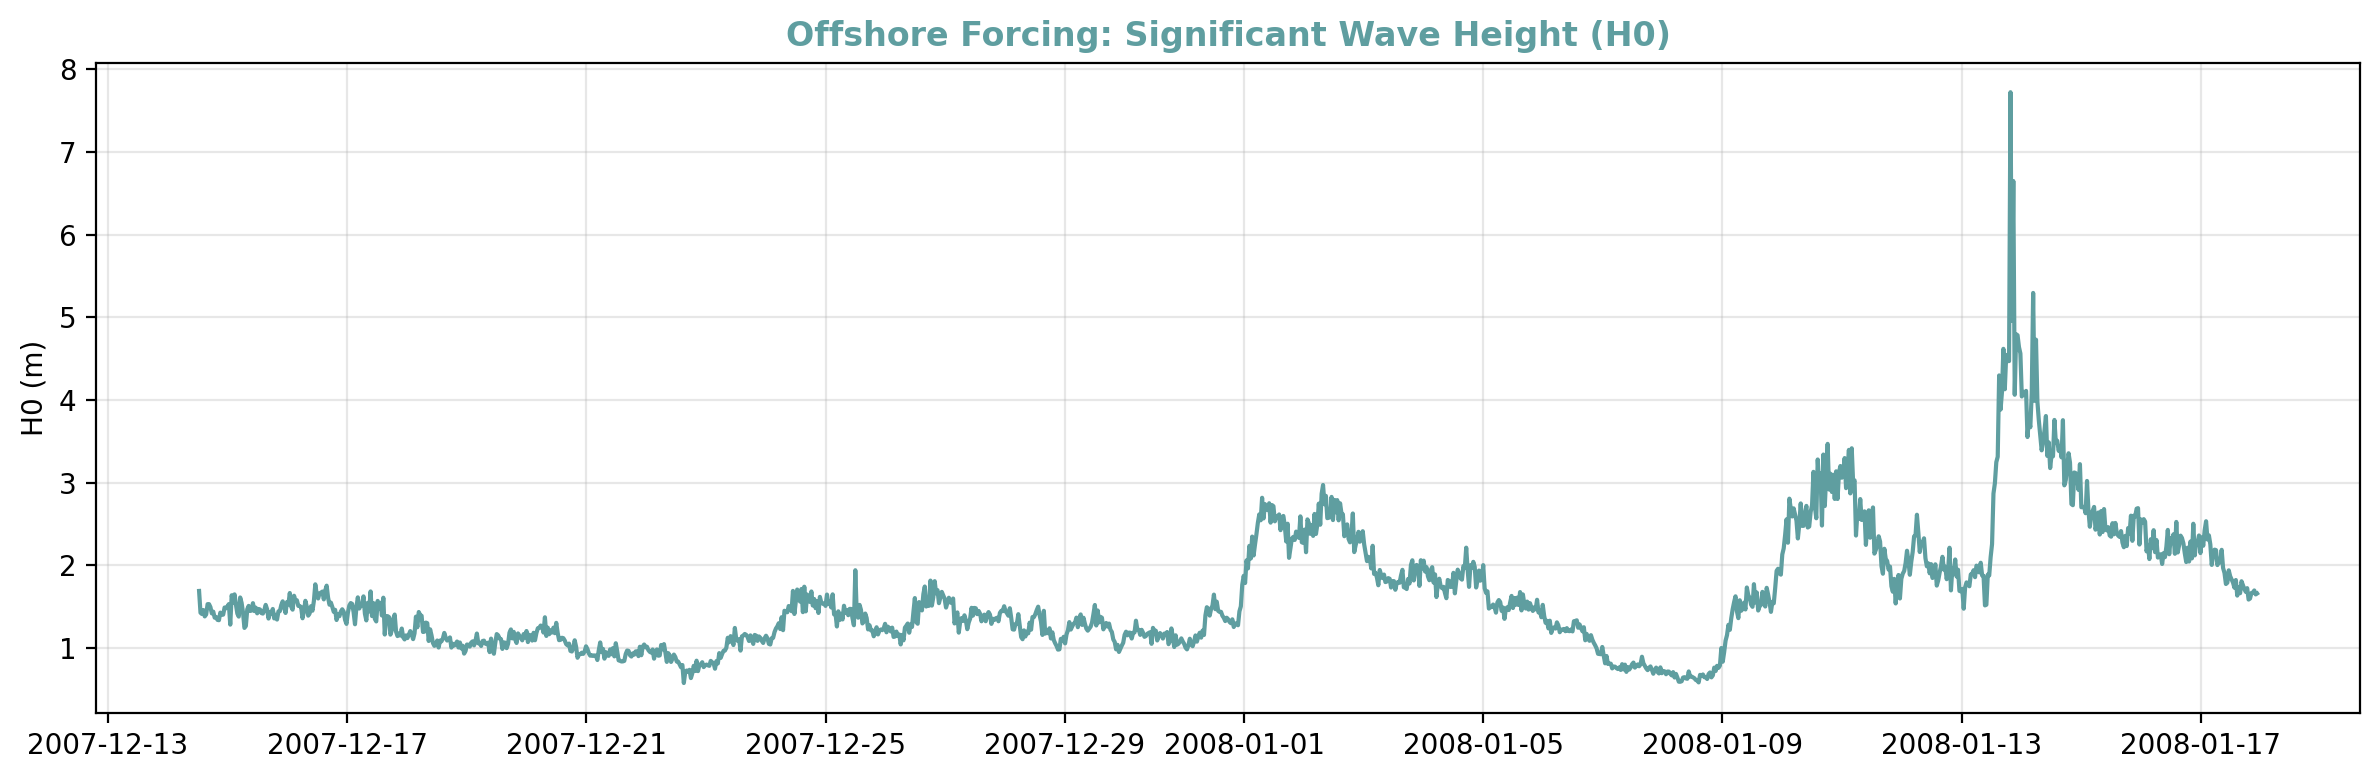

In [35]:
import sys
sys.path.append("..")
import pandas as pd
import matplotlib.pyplot as plt
from src.spectra import sensor_spectra
from src.bulk_parameters import compute_H0
import numpy as np


# ---- load data ----- #
df1 = pd.read_parquet('../data_interim/df1.parquet')
df6 = pd.read_parquet('../data_interim/df6.parquet')

# compute spectra
S1 = sensor_spectra(df1, nperseg = 4096)
S6 = sensor_spectra(df6, nperseg = 4096)

# compute offshore bulk
bulk6 = compute_H0(S6)

# --- H0 time series ---
fig = plt.figure(figsize=(12, 4), dpi=200)
plt.plot(bulk6.index, bulk6['H0'], color='cadetblue')
plt.ylabel('H0 (m)')
plt.title('Offshore Forcing: Significant Wave Height (H0)', fontweight='bold', color='cadetblue')
plt.grid(True, alpha=0.3)
plt.tight_layout()


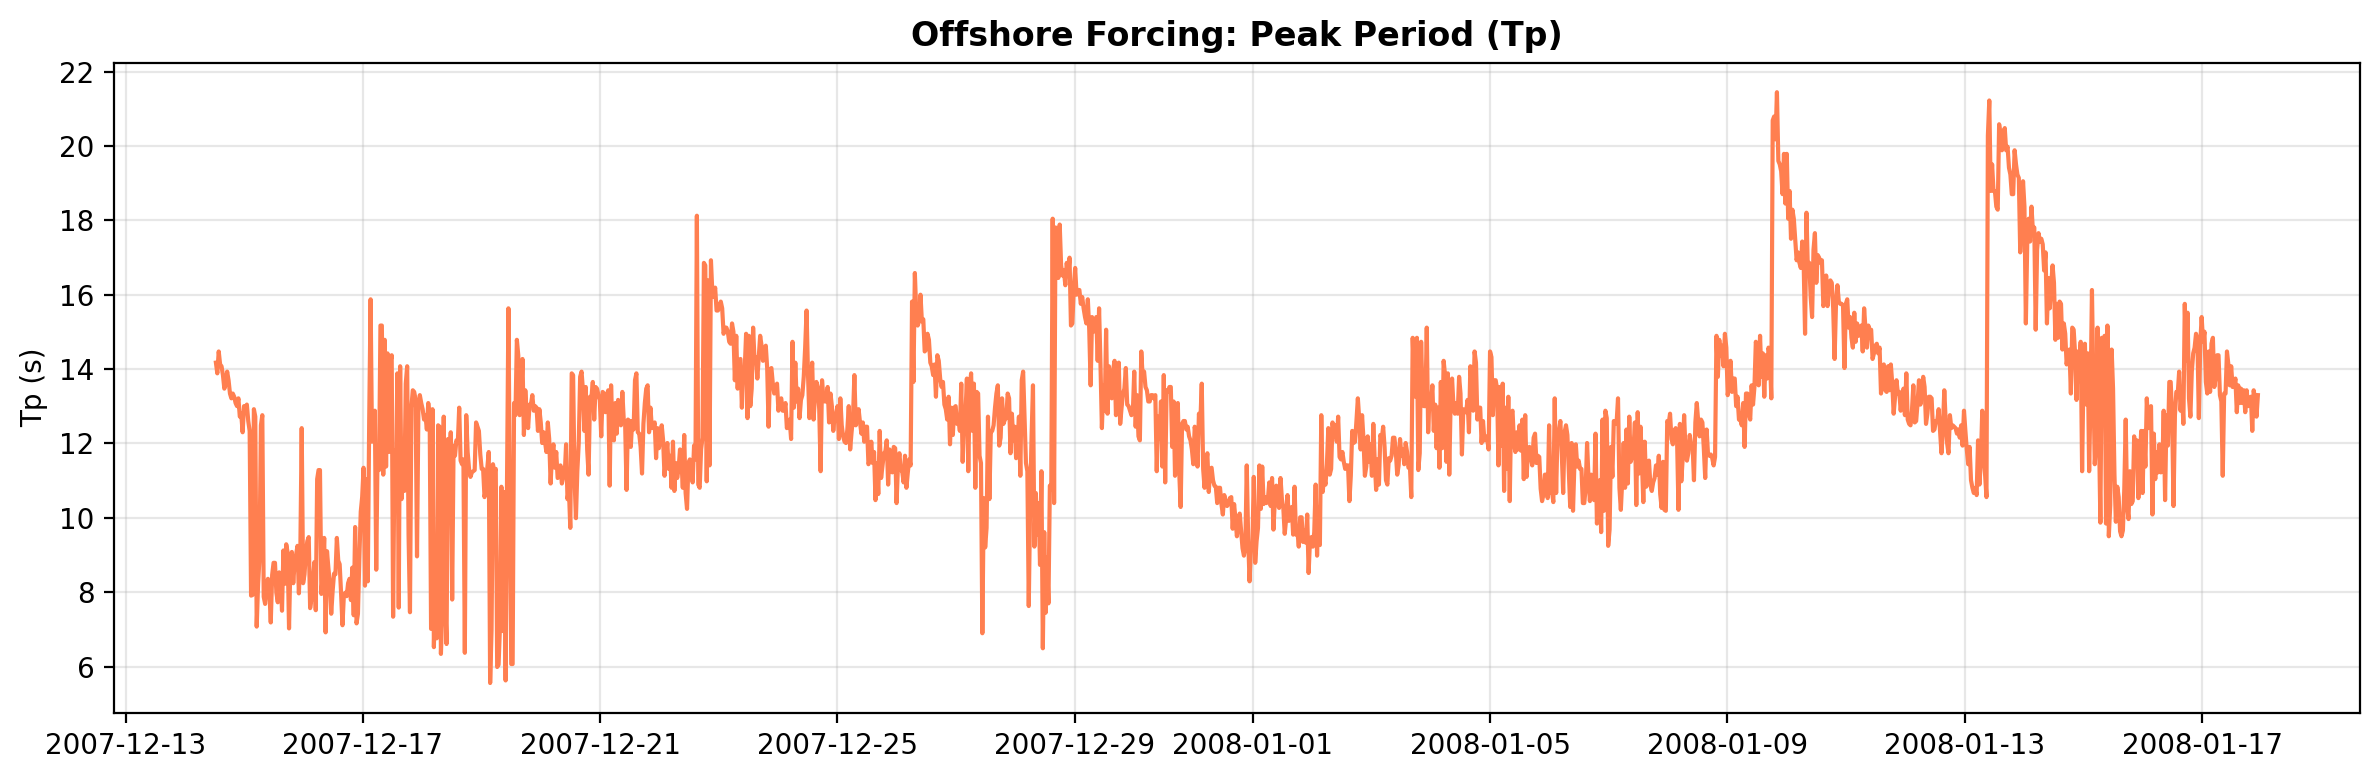

In [36]:
# --- Tp time series ---
fig = plt.figure(figsize=(12, 4), dpi=200)
plt.plot(bulk6.index, bulk6['Tp'], color='coral')
plt.ylabel('Tp (s)')
plt.title('Offshore Forcing: Peak Period (Tp)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()


#### wave transformation at reef

(0.0, 0.1)

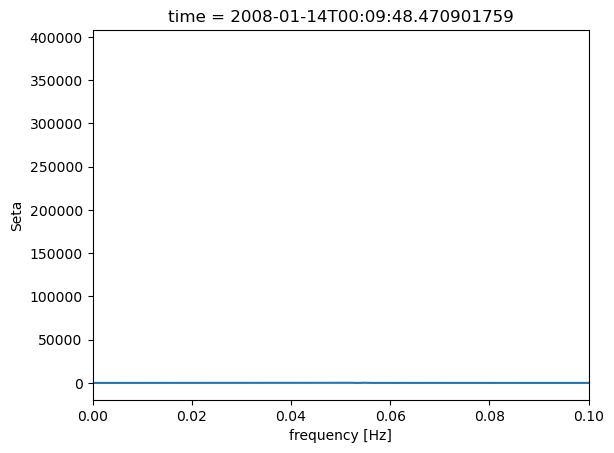

In [37]:
S6.Seta.sel(time='2008-01-14 00:00:00', method='nearest').plot()
plt.xlim(0,0.1)

In [38]:
1/5

0.2

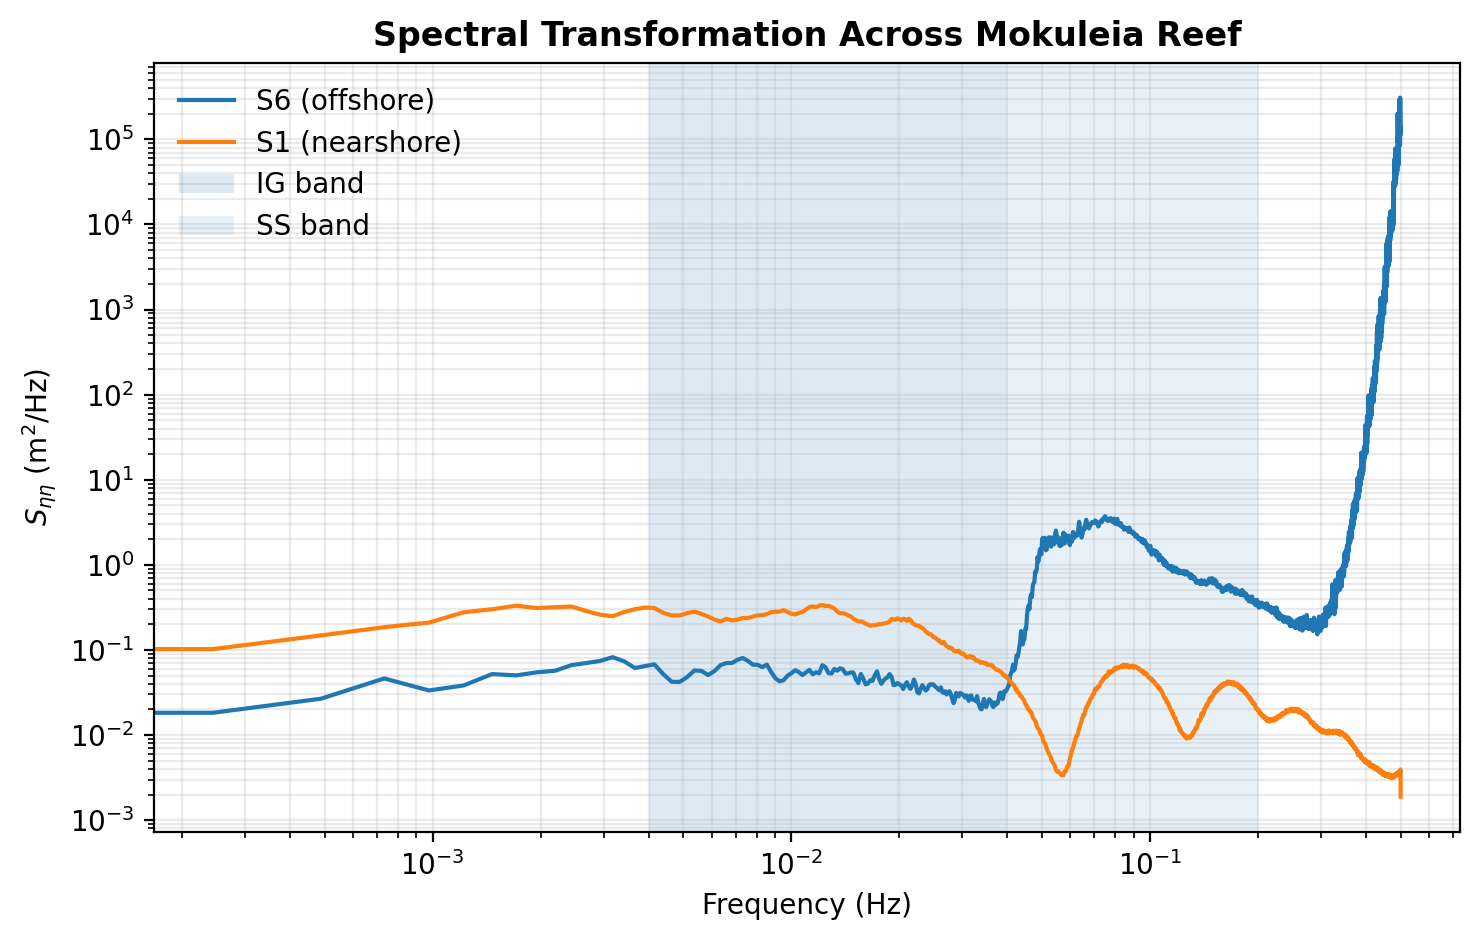

In [39]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# --- define bands (edit if you use different cutoffs) ---
IG = (0.004, 0.04)   # ~25–250 s (common reef IG band)
SS = (0.04, 0.20)    # sea-swell band (up to your f_cutoff)

def band_mask(freq, band):
    return (freq >= band[0]) & (freq <= band[1])

def band_integral(Seta, freq, band):
    """Integrate Seta over a frequency band -> variance (m^2)."""
    m = band_mask(freq, band)
    return Seta.where(m).integrate("frequency")

# --- time-mean spectra ---
S6_mean = S6["Seta"].mean("time", skipna=True)
S1_mean = S1["Seta"].mean("time", skipna=True)
f = S6["frequency"]

plt.figure(figsize=(7.5, 4.8), dpi=200)

plt.loglog(f, S6_mean, label="S6 (offshore)")
plt.loglog(f, S1_mean, label="S1 (nearshore)")

# Shade IG + SS bands
plt.axvspan(IG[0], IG[1], alpha=0.15, label="IG band")
plt.axvspan(SS[0], SS[1], alpha=0.10, label="SS band")

plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$S_{\eta\eta}$ (m$^2$/Hz)")
plt.title("Spectral Transformation Across Mokuleia Reef", fontweight="bold")
plt.grid(True, which="both", alpha=0.25)
plt.legend(frameon=False, loc="best")
plt.tight_layout()

plt.savefig("slide6_PSD_mean_overlay_S6_vs_S1.png", dpi=300, bbox_inches="tight")
plt.show()



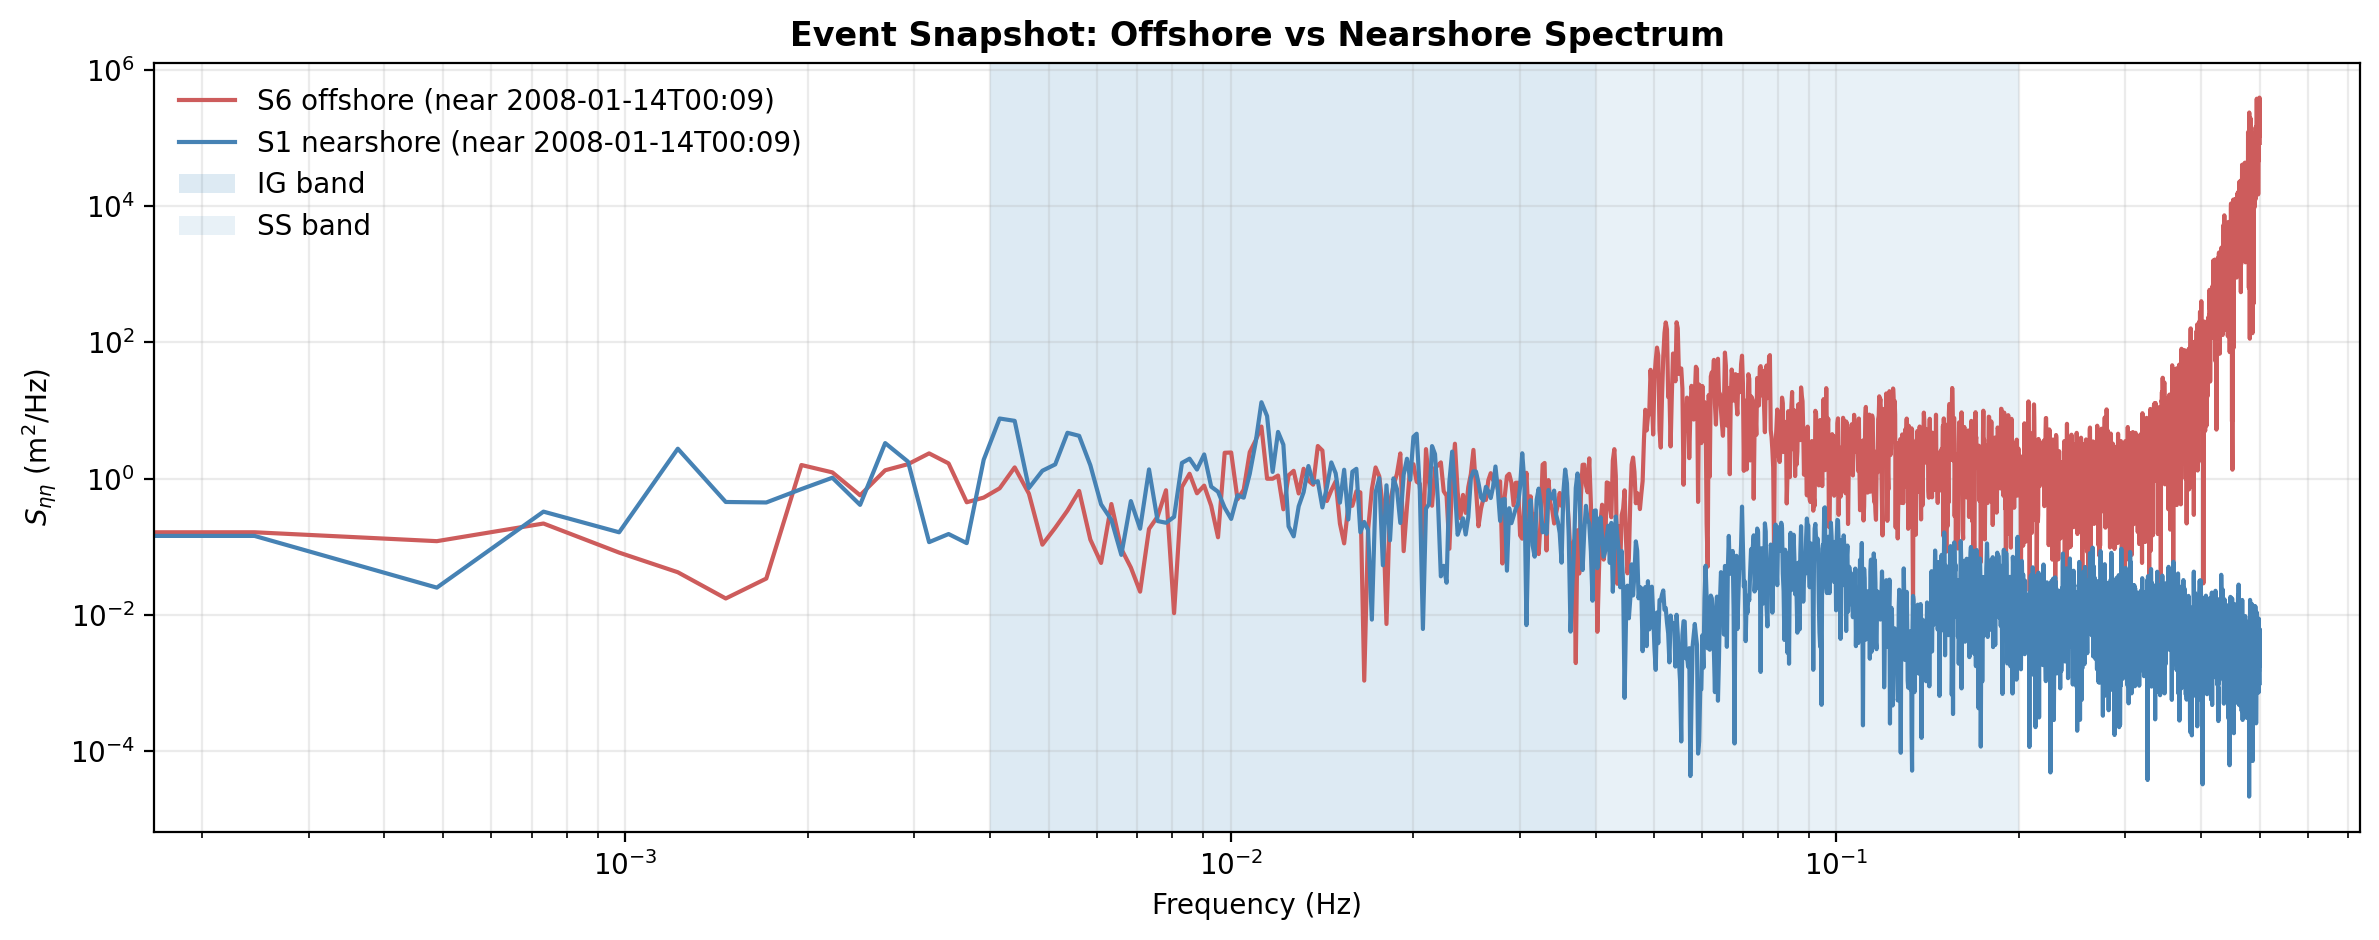

In [40]:
import pandas as pd
t_event = pd.Timestamp("2008-01-14 00:00:00")  # edit to your event time


S6_evt = S6["Seta"].sel(time=t_event, method="nearest")
S1_evt = S1["Seta"].sel(time=t_event, method="nearest")
f = S6["frequency"]

plt.figure(figsize=(12, 4.8), dpi=200)

plt.loglog(f, S6_evt, label=f"S6 offshore (near {str(S6_evt['time'].values)[:16]})", color='IndianRed')
plt.loglog(f, S1_evt, label=f"S1 nearshore (near {str(S1_evt['time'].values)[:16]})", color='SteelBlue')

plt.axvspan(IG[0], IG[1], alpha=0.15, label="IG band")
plt.axvspan(SS[0], SS[1], alpha=0.10, label="SS band")

plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$S_{\eta\eta}$ (m$^2$/Hz)")
plt.title("Event Snapshot: Offshore vs Nearshore Spectrum", fontweight="bold")
plt.grid(True, which="both", alpha=0.25)
plt.legend(frameon=False, loc="best")
plt.tight_layout()

plt.savefig("slide6_PSD_event_snapshot_S6_vs_S1.png", dpi=300, bbox_inches="tight")
plt.show()
